In [1]:
import pandas as pd
import numpy as np
from openff.toolkit.topology import Molecule
from openff.units import unit
import seaborn as sb
from scipy import stats
import matplotlib.pyplot as plt
from rdkit.Chem import Draw
from chargecraft.storage.storage import MoleculePropStore
from rdkit.Chem import AllChem

def equalityline(x, y, ax = None, **kwargs):
    x0, x1 = min(x), max(x)
    y0, y1 = min(y), max(y)
    lims = [min(x0, y0), max(x1, y1)]
    ax = ax or plt.gca()
    ax.plot(lims, lims, **kwargs)

def m(x, y, ax = None, **kwargs):
    
    x = np.array(x)
    y = np.array(y)
    ax = ax or plt.gca()
    m =(np.sum((x - y)**2, axis=0)/(y.shape[0]))**0.5
    ax.annotate(f'$RMSE= {float(m):.2f}$',
                xy=(.01, .99), xycoords=ax.transAxes, fontsize=8,
                color='darkred', backgroundcolor='#FFFFFF99', ha='left', va='top')   
    
def kde(x, y, ax = None, **kwargs):
    if isinstance(x, np.ndarray) and isinstance(y, np.ndarray):
        x = np.array(x)
        y = np.array(y)
    ax = ax or plt.gca()
    kernel = stats.gaussian_kde(x)(y)
    ax.scatter(x, y, c=kernel, s=5)

In [2]:
parquet = "./grouped_wb97x.parquet"
df = pd.read_parquet(parquet)
df

mbis_charges  \
0    [-0.16268842611744566, -0.04862053211163669, -...   
1    [-0.15355895134911451, -0.03371448190417054, -...   
2    [-0.1684974792991123, -0.019096709438609166, -...   
3    [-0.17054456335625917, -0.04173740410952515, -...   
4    [-0.17636289708512914, -0.038781843962180595, ...   
..                                                 ...   
400  [-0.5012527151778318, 0.31974086288271847, -0....   
401  [-0.5046633399195547, 0.32169282861653126, -0....   
402  [-0.5075628398314149, 0.34190964784430056, -0....   
403  [-0.5001343234948015, 0.3157845367085843, -0.4...   
404  [-0.5008496806604411, 0.3199874780862853, -0.4...   

                                        am1bcc_charges  \
0    [0.07483121875000001, 0.10543121875, -0.388968...   
1    [0.06876874999999999, 0.11603575, -0.34869825,...   
2    [0.06449831250000002, 0.1227643125, -0.3509686...   
3    [0.06846703125, 0.10273303125000002, -0.375332...   
4    [0.0697999375, 0.1093999375, -0.3506670625, 0....   
..                                                 ...   
400  [-0.05091747368421051, -0.040317473684210514, ...   
401  [-0.051899947368421046, -0.039299947368421045,...   
402  [-0.05691750877192981, -0.01731750877192981, -...   
403  [-0.04988252631578947, -0.043282526315789466, ...   
404  [-0.05084738596491228, -0.03824738596491228, -...   

                                      espaloma_charges riniker_monopoles  \
0    [0.08158419548999518, 0.18139159574639052, -0....              None   
1    [0.08158419548999518, 0.18139159574639052, -0....              None   
2    [0.08158419548999518, 0.18139159574639052, -0....              None   
3    [0.08158419548999518, 0.18139159574639052, -0....              None   
4    [0.08158419548999518, 0.18139159574639052, -0....              None   
..                                                 ...               ...   
400  [-0.10983861767147717, 0.27650559164191546, -0...              None   
401  [-0.10983861767147717, 0.27650559164191546, -0...              None   
402  [-0.10983861767147717, 0.27650559164191546, -0...              None   
403  [-0.10983861767147717, 0.27650559164191546, -0...              None   
404  [-0.10983861767147717, 0.27650559164191546, -0...              None   

                                          resp_charges  qm_dipoles  \
0    [-0.29, 0.1213, -0.3505, 0.8191, -0.2951, -0.3...    1.635670   
1    [-0.0073, -0.0954, -0.2803, 0.7953, -0.3132, -...    1.501376   
2    [0.0626, 0.0516, -0.0984, 0.1955, -0.0937, -0....    2.835775   
3    [-0.1912, -0.0076, -0.2944, 0.7857, -0.3141, -...    2.407196   
4    [-0.2621, 0.0025, -0.317, 0.8059, -0.2964, -0....    1.877543   
..                                                 ...         ...   
400  [-0.7274, 0.332, -0.4863, 0.1052, 0.0589, -0.3...    2.123525   
401  [-0.9122, 0.2679, -0.3442, 0.0575, 0.0489, -0....    1.853488   
402  [-0.6757, 0.3518, -0.488, 0.1046, 0.0704, -0.3...    1.623343   
403  [-0.7157, 0.3917, -0.5305, 0.0847, 0.1094, -0....    2.607368   
404  [-0.7208, 0.2852, -0.432, 0.0949, 0.0508, -0.3...    2.317684   

     mbis_dipoles  am1bcc_dipole  espaloma_dipole  riniker_dipoles  ...  \
0        1.773238       2.488876         2.094020              NaN  ...   
1        1.659710       1.265666         1.042737              NaN  ...   
2        3.151387       3.223006         3.457578              NaN  ...   
3        2.540471       1.878216         2.269720              NaN  ...   
4        2.018615       2.119655         1.970021              NaN  ...   
..            ...            ...              ...              ...  ...   
400      2.139476       2.167373         4.823668              NaN  ...   
401      2.338880       2.560352         4.914295              NaN  ...   
402      1.512362       1.609755         2.710200              NaN  ...   
403      2.666338       2.673481         4.093654              NaN  ...   
404      2.478858       2.553832         4.832291              NaN  .

In [3]:
#merge the hf data into this
parquet = "../charge_models_no_riniker_2.parquet"
hf_df= pd.read_parquet(parquet)
hf_df = hf_df.rename(columns={'am1bcc_esp_rms': 'am1bcc_esp_rms_hf'})
df = pd.merge(
    df,
    hf_df[['molecule', 'conformer_no', 'am1bcc_esp_rms_hf']],
    on=['molecule', 'conformer_no'],
    how='left'  # Using left join ensures all rows in dft_df are kept
)


In [4]:
df

mbis_charges  \
0    [-0.16268842611744566, -0.04862053211163669, -...   
1    [-0.15355895134911451, -0.03371448190417054, -...   
2    [-0.1684974792991123, -0.019096709438609166, -...   
3    [-0.17054456335625917, -0.04173740410952515, -...   
4    [-0.17636289708512914, -0.038781843962180595, ...   
..                                                 ...   
400  [-0.5012527151778318, 0.31974086288271847, -0....   
401  [-0.5046633399195547, 0.32169282861653126, -0....   
402  [-0.5075628398314149, 0.34190964784430056, -0....   
403  [-0.5001343234948015, 0.3157845367085843, -0.4...   
404  [-0.5008496806604411, 0.3199874780862853, -0.4...   

                                        am1bcc_charges  \
0    [0.07483121875000001, 0.10543121875, -0.388968...   
1    [0.06876874999999999, 0.11603575, -0.34869825,...   
2    [0.06449831250000002, 0.1227643125, -0.3509686...   
3    [0.06846703125, 0.10273303125000002, -0.375332...   
4    [0.0697999375, 0.1093999375, -0.3506670625, 0....   
..                                                 ...   
400  [-0.05091747368421051, -0.040317473684210514, ...   
401  [-0.051899947368421046, -0.039299947368421045,...   
402  [-0.05691750877192981, -0.01731750877192981, -...   
403  [-0.04988252631578947, -0.043282526315789466, ...   
404  [-0.05084738596491228, -0.03824738596491228, -...   

                                      espaloma_charges riniker_monopoles  \
0    [0.08158419548999518, 0.18139159574639052, -0....              None   
1    [0.08158419548999518, 0.18139159574639052, -0....              None   
2    [0.08158419548999518, 0.18139159574639052, -0....              None   
3    [0.08158419548999518, 0.18139159574639052, -0....              None   
4    [0.08158419548999518, 0.18139159574639052, -0....              None   
..                                                 ...               ...   
400  [-0.10983861767147717, 0.27650559164191546, -0...              None   
401  [-0.10983861767147717, 0.27650559164191546, -0...              None   
402  [-0.10983861767147717, 0.27650559164191546, -0...              None   
403  [-0.10983861767147717, 0.27650559164191546, -0...              None   
404  [-0.10983861767147717, 0.27650559164191546, -0...              None   

                                          resp_charges  qm_dipoles  \
0    [-0.29, 0.1213, -0.3505, 0.8191, -0.2951, -0.3...    1.635670   
1    [-0.0073, -0.0954, -0.2803, 0.7953, -0.3132, -...    1.501376   
2    [0.0626, 0.0516, -0.0984, 0.1955, -0.0937, -0....    2.835775   
3    [-0.1912, -0.0076, -0.2944, 0.7857, -0.3141, -...    2.407196   
4    [-0.2621, 0.0025, -0.317, 0.8059, -0.2964, -0....    1.877543   
..                                                 ...         ...   
400  [-0.7274, 0.332, -0.4863, 0.1052, 0.0589, -0.3...    2.123525   
401  [-0.9122, 0.2679, -0.3442, 0.0575, 0.0489, -0....    1.853488   
402  [-0.6757, 0.3518, -0.488, 0.1046, 0.0704, -0.3...    1.623343   
403  [-0.7157, 0.3917, -0.5305, 0.0847, 0.1094, -0....    2.607368   
404  [-0.7208, 0.2852, -0.432, 0.0949, 0.0508, -0.3...    2.317684   

     mbis_dipoles  am1bcc_dipole  espaloma_dipole  riniker_dipoles  ...  \
0        1.773238       2.488876         2.094020              NaN  ...   
1        1.659710       1.265666         1.042737              NaN  ...   
2        3.151387       3.223006         3.457578              NaN  ...   
3        2.540471       1.878216         2.269720              NaN  ...   
4        2.018615       2.119655         1.970021              NaN  ...   
..            ...            ...              ...              ...  ...   
400      2.139476       2.167373         4.823668              NaN  ...   
401      2.338880       2.560352         4.914295              NaN  ...   
402      1.512362       1.609755         2.710200              NaN  ...   
403      2.666338       2.673481         4.093654              NaN  ...   
404      2.478858       2.553832         4.832291              NaN  .

In [5]:

# # Your DataFrame is assumed to be named `df`

# # Define the three problematic entries
# failures = [
#     {'molecule': '[C:1]([C:2]([N+:3]([C:4]([C:5](=[O:6])[O-:7])([H:33])[H:34])([C:8]([C:9](=[O:10])[O-:11])([H:35])[H:36])[H:32])([H:30])[H:31])([N+:12]([C:13]([C:14]([N+:15]([C:16]([C:17](=[O:18])[O-:19])([H:43])[H:44])([C:20]([C:21](=[O:22])[O-:23])([H:45])[H:46])[H:42])([H:40])[H:41])([H:38])[H:39])([C:24]([C:25](=[O:26])[O-:27])([H:47])[H:48])[H:37])([H:28])[H:29]',
#      'conformer_no': 2},
#     {'molecule': '[C:1]([C:2](=[O:3])[O:4][C:5]([C:6]1=[C:7]([C:24](=[O:25])[O-:26])[N:8]2[C@@:9]([H:32])([C@@:10]([N:13]([C:14](=[O:15])[C:16]([C:17]3=[C:18]([H:37])[C:19]([H:38])=[C:20]([H:39])[S:21]3)([H:35])[H:36])[H:34])([H:33])[C:11]2=[O:12])[S:22][C:23]1([H:40])[H:41])([H:30])[H:31])([H:27])([H:28])[H:29]'},
#     {'molecule': '[C:1]([C:2]([C:3]([C:4]([C:5]([C@@:6]([C:7]([H:38])([H:39])[H:40])(/[C:8](=[C:9](/[C@:10]1([H:43])[C@@:11]([O:25][H:60])([H:44])[C:12]([H:45])([H:46])[C@@:13]([O:24][H:59])([H:47])[C@@:14]1([C:15]([C:16](=[C:17]([C:18]([C:19]([C:20]([C:21](=[O:22])[O-:23])([H:57])[H:58])([H:55])[H:56])([H:53])[H:54])[H:52])[H:51])([H:49])[H:50])[H:48])[H:42])[H:41])[O:26][H:61])([H:36])[H:37])([H:34])[H:35])([H:32])[H:33])([H:30])[H:31])([H:27])([H:28])[H:29]',
#      'conformer_no': 6},
#     {'molecule': '[C:1]([C:2]([C:3](=[O:4])[N:5]([C@@:6]([C:7]([S:8][H:29])([H:27])[H:28])([C:9](=[O:10])[N:11]([C:12]([C:13](=[O:14])[O-:15])([H:31])[H:32])[H:30])[H:26])[H:25])([H:23])[H:24])([C@@:16]([C:17](=[O:18])[O-:19])([N+:20]([H:34])([H:35])[H:36])[H:33])([H:21])[H:22]',
#     'conformer_no': 1},
#     {'molecule': '[C:1]([C:2]([O:3][N+:4](=[O:5])[O-:6])([H:22])[H:23])([N+:7]([C:8]([C:9]([O:10][N+:11](=[O:12])[O-:13])([H:27])[H:28])([H:25])[H:26])([C:14]([C:15]([O:16][N+:17](=[O:18])[O-:19])([H:31])[H:32])([H:29])[H:30])[H:24])([H:20])[H:21]',
#      'conformer_no': 1},
#     {'molecule': '[C:1]([C:2]([O:3][N+:4](=[O:5])[O-:6])([H:22])[H:23])([N+:7]([C:8]([C:9]([O:10][N+:11](=[O:12])[O-:13])([H:27])[H:28])([H:25])[H:26])([C:14]([C:15]([O:16][N+:17](=[O:18])[O-:19])([H:31])[H:32])([H:29])[H:30])[H:24])([H:20])[H:21]',
#      'conformer_no': 6},
# ]

# # Build a mask to filter them out
# mask = pd.Series([True] * len(df))  # Start with all True

# for f in failures:
#     submask = (df['molecule'] == f['molecule'])
#     if 'conformer_no' in f:
#         submask &= (df['conformer_no'] == f['conformer_no'])
#     mask &= ~submask  # Negate submask to drop the failures

# # Apply the mask to get the filtered DataFrame
# df = df[mask]
# df


In [6]:
df.to_csv("chargecraft_dft_am1bcc.csv")

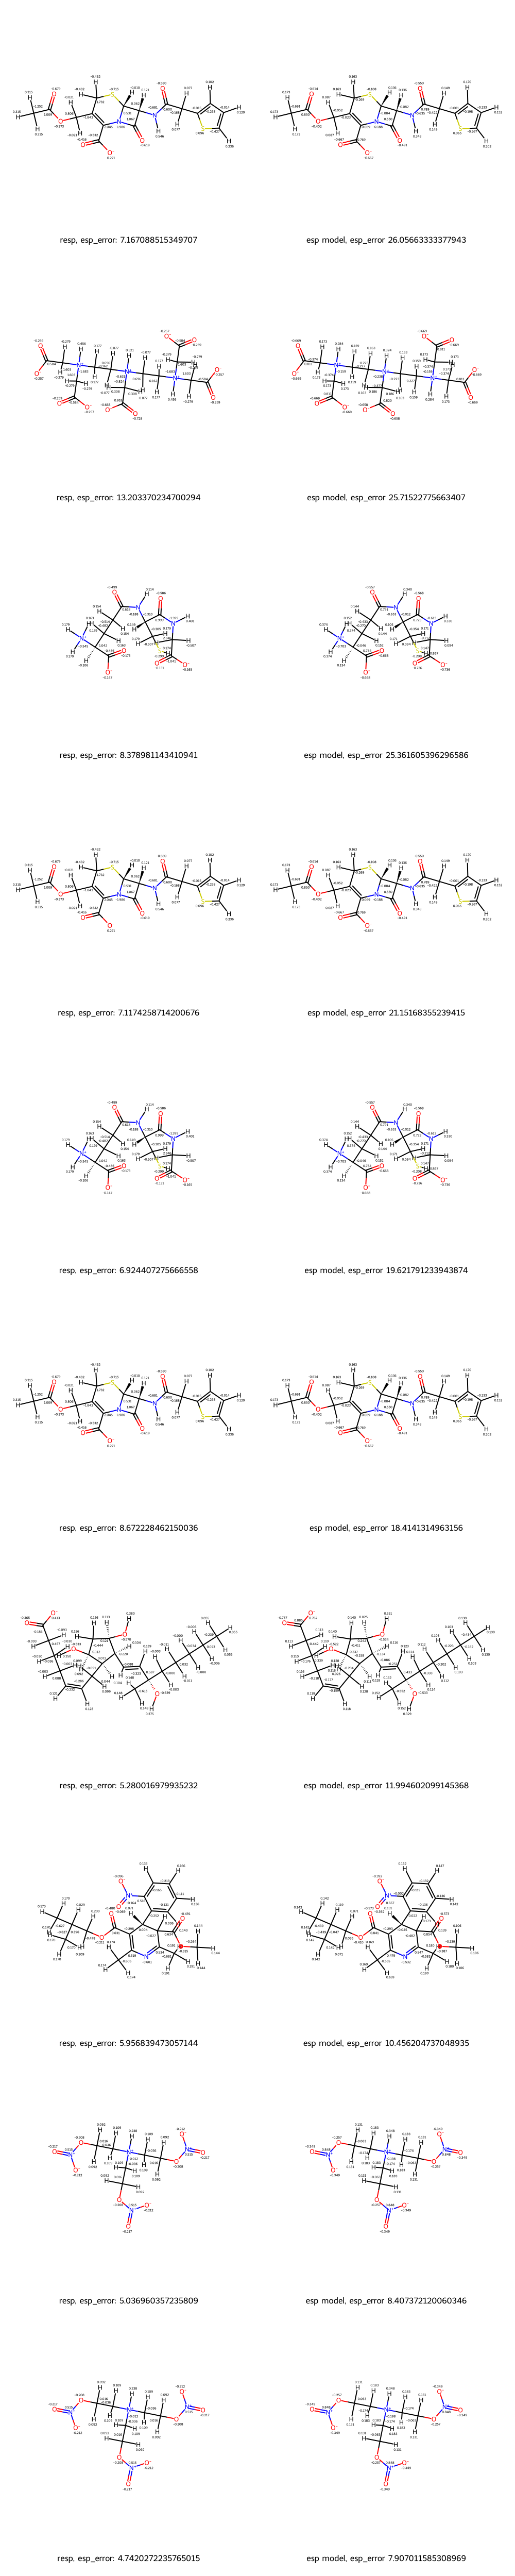

In [7]:
def label_rdkit(molecule, charges):
    AllChem.Compute2DCoords(molecule)

    for i, atom in enumerate(molecule.GetAtoms()):
        lbl = '%.3f' % (charges[i])
        atom.SetProp('atomNote', lbl)
    return molecule

rows_to_analyse = df.sort_values('esp_model_esp_rmse', ascending=False).iloc[:10]
rdkit_molecules = []
labels = []

for row in rows_to_analyse.iterrows():
    row = row[-1]
    tagged_smiles = row['molecule']
    openff = Molecule.from_mapped_smiles(tagged_smiles, allow_undefined_stereo=True)
    geometry = row['geometry'].reshape(-1,3) * unit.angstrom
    openff.add_conformer(geometry)
    resp_mol = openff.to_rdkit()
    resp_multi_mol = label_rdkit(resp_mol, row['resp_multiconf_charges'])
    labels.append(f'resp, esp_error: {row["resp_multiconf_esp_rmse"]}')
    rdkit_molecules.append(resp_multi_mol)
    esp_mol = openff.to_rdkit()
    esp_multi_mol = label_rdkit(esp_mol, row['esp_model_charges'])
    rdkit_molecules.append(esp_multi_mol)
    labels.append(f'esp model, esp_error {row["esp_model_esp_rmse"]}')

Draw.MolsToGridImage(rdkit_molecules, molsPerRow=2, legends=labels, subImgSize=(500,500))

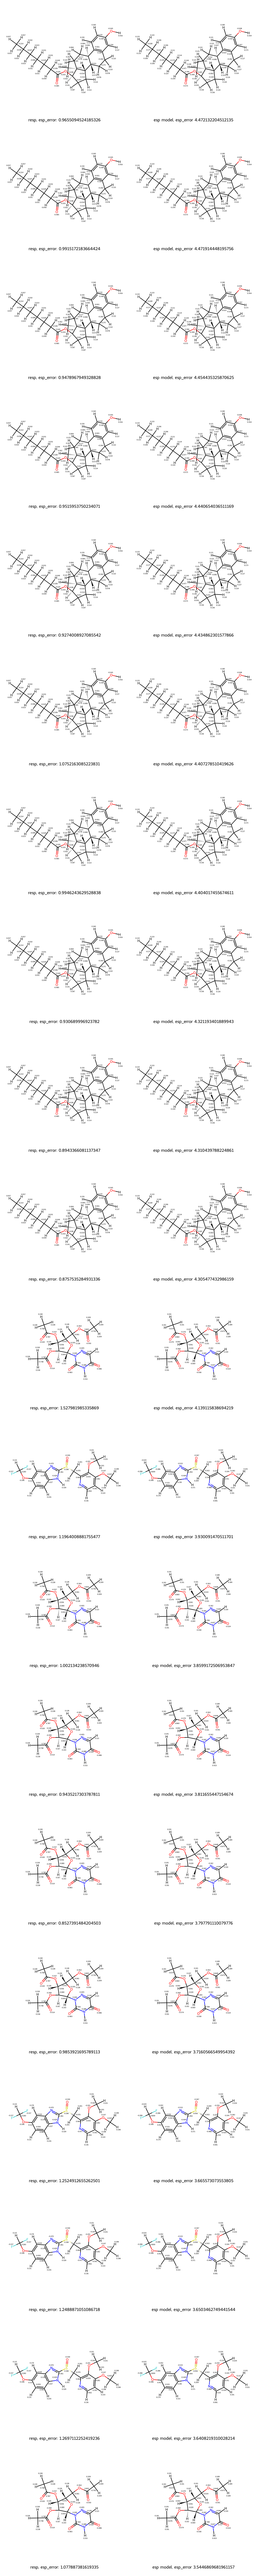

In [8]:
def label_rdkit(molecule, charges):
    AllChem.Compute2DCoords(molecule)
    for i, atom in enumerate(molecule.GetAtoms()):
        lbl = '%.3f' % (charges[i])
        atom.SetProp('atomNote', lbl)
    return molecule

rows_to_analyse = df.sort_values('esp_model_esp_rmse', ascending=False)
rows_to_analyse = rows_to_analyse[
    ~(rows_to_analyse['molecule'].str.contains("+", regex = False))  &
    ~(rows_to_analyse['molecule'].str.contains("-", regex = False))
].iloc[:20]
rdkit_molecules = []
labels = []

for row in rows_to_analyse.iterrows():
    row = row[-1]
    tagged_smiles = row['molecule']
    openff = Molecule.from_mapped_smiles(tagged_smiles, allow_undefined_stereo=True)
    geometry = row['geometry'].reshape(-1,3) * unit.angstrom
    openff.add_conformer(geometry)
    resp_mol = openff.to_rdkit()
    resp_multi_mol = label_rdkit(resp_mol, row['resp_multiconf_charges'])
    labels.append(f'resp, esp_error: {row["resp_multiconf_esp_rmse"]}')
    rdkit_molecules.append(resp_multi_mol)
    esp_mol = openff.to_rdkit()
    esp_multi_mol = label_rdkit(esp_mol, row['esp_model_charges'])
    rdkit_molecules.append(esp_multi_mol)
    labels.append(f'esp model, esp_error {row["esp_model_esp_rmse"]}')

Draw.MolsToGridImage(rdkit_molecules, molsPerRow=2, legends=labels, subImgSize=(500,500))

In [9]:
df.columns

Index(['mbis_charges', 'am1bcc_charges', 'espaloma_charges',
       'riniker_monopoles', 'resp_charges', 'qm_dipoles', 'mbis_dipoles',
       'am1bcc_dipole', 'espaloma_dipole', 'riniker_dipoles', 'resp_dipole',
       'am1bcc_esp_rms', 'am1bcc_esp', 'espaloma_esp_rms', 'espaloma_esp',
       'resp_esp_rms', 'resp_esp', 'mbis_esp_rms', 'mbis_esp',
       'riniker_esp_rms', 'riniker_esp', 'qm_esp', 'mol_id',
       'resp_multiconf_esp', 'am1bcc_multiconf_esp', 'resp_multiconf_esp_rmse',
       'am1bcc_multiconf_esp_rmse', 'resp_multiconf_charges',
       'am1bccc_multiconf_charges', 'resp_multiconf_dipoles',
       'am1bcc_multiconf_dipoles', 'charge_model_charges',
       'charge_model_dipoles', 'charge_model_esp', 'charge_model_esp_rmse',
       'dipole_model_charges', 'dipole_model_dipoles', 'dipole_model_esp',
       'dipole_model_esp_rmse', 'esp_model_charges', 'esp_model_dipoles',
       'esp_model_esp', 'esp_model_esp_rmse', 'molecule', 'grid', 'geometry',
       'conformer_no', 

['charge_modele', 'dipole_modele', 'esp_modele', 'am1bcc_hf', 'resp_multiconfe']


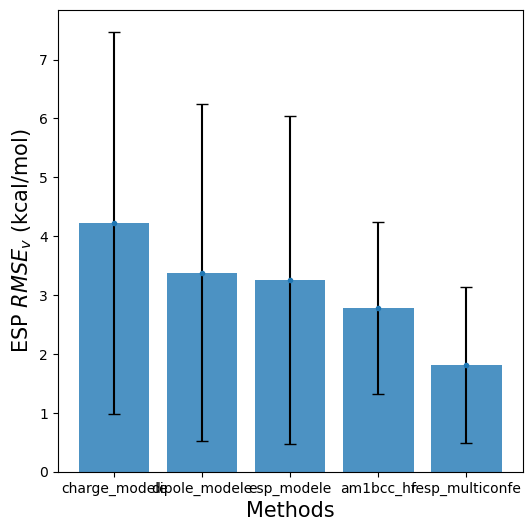

In [10]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Define the columns to compare
compare_columns = ['resp_multiconf_esp_rmse', 'charge_model_esp_rmse', 'dipole_model_esp_rmse', 'esp_model_esp_rmse','am1bcc_esp_rms_hf']

# Calculate mean and standard deviation for the columns
mean_values = df[compare_columns].mean()
std_dev_values = df[compare_columns].std()

# Create a DataFrame for easy sorting and plotting
mean_values_df = pd.DataFrame({
    'mean': mean_values,
    'std_dev': std_dev_values,
    # 'color': [color_map[col] for col in compare_columns]  # Map colors to methods
}).sort_values(by='mean', ascending=False)

# Remove '_esp_rms' from the xtick labels
xtick_labels = [label.replace('_esp_rms', '') for label in mean_values_df.index]
print(xtick_labels)
width = 6

# Plot the bar chart with error bars
plt.figure(figsize=(width, 6))  # Adjust figure size as needed
plt.bar(
    x=xtick_labels,
    height=mean_values_df['mean'],
    # color=mean_values_df['color'],  # Use the assigned colors
    alpha=0.8,
    label='Mean ESP RMSE'
)
plt.errorbar(
    x=xtick_labels,
    y=mean_values_df['mean'],
    yerr=mean_values_df['std_dev'],
    fmt=".", ecolor='black', capsize=4
)

# Add labels and formatting
# plt.xticks(ticks=range(len(new_labels)), labels=new_labels,rotation=45, ha='right', fontsize=13)
plt.ylabel('ESP $RMSE_{v}$ (kcal/mol)', fontsize=15)
plt.xlabel('Methods', fontsize=15)
# plt.title('Comparison of ESP RMSE Values Across Methods', fontsize=14)

# Add a legend for context
red_patch = mpatches.Patch(color='red',
    label='Requires QM\ncalculation')
green_patch = mpatches.Patch(color='green',
    label='Requires semi-empirical\nQM calculation')
blue_patch = mpatches.Patch(color='blue',
    label='No QM calculation\nrequired')

# Save the figure or display it
plt.savefig('esp_comparison.png', dpi=800, bbox_inches='tight')
plt.show()


0.6605576556029176
1.6233056210179826
1.4282077898062728
1.3934103849677022
0.7299859230947504


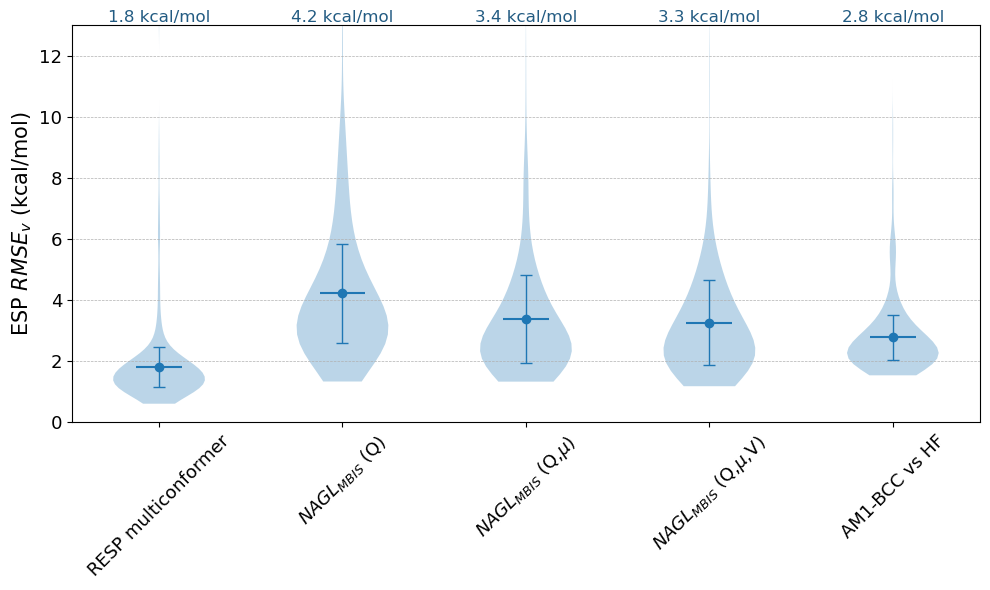

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['font.size'] = 10          # Base font size
mpl.rcParams['axes.labelsize'] = 15     # Axis label font size
mpl.rcParams['legend.fontsize'] = 15
mpl.rcParams['xtick.labelsize'] =13
mpl.rcParams['ytick.labelsize'] = 13

grouped = df.groupby("smiles")

# Collect standard deviations across atoms for each chcompare_columnsarge model
std_deviation_data = {model: [] for model in compare_columns}

for smiles, group in grouped:
    for model in compare_columns:
        # Stack esps across conformers for the current model
        esps = np.vstack(group[model].to_list())  # Shape: (num_conformers, num_atoms)
        # Compute standard deviation for each atom across conformers
        # std_deviation = np.std(esps, axis=0)  # Shape: (num_atoms,)
        # # Add to the dataset for the box plot
        # std_deviation_data[model].extend(std_deviation)
        
# mean_std_deviation = {model: np.mean(std_deviation_data[model]) for model in compare_columns}

plt.figure(figsize=(10, 6))
violin_data = [df[model] for model in compare_columns]
violin_data = [df[model].to_numpy() for model in compare_columns]
violin_data = [df[model].dropna().values for model in compare_columns]


# Draw the violin plot with means displayed
parts = plt.violinplot(
    violin_data,
    showmeans=True,  # show the green mean lines inside violins
    showextrema=False,
    showmedians=False
)


# Mark means and std deviations with error bars
for i, model in enumerate(compare_columns, start=1):
    mean_val = violin_data[i-1].mean()
    std_val = np.array(violin_data[i-1]).std()/2
    print(std_val)
    # Use errorbar to create vertical lines with top/bottom caps (±1 std)
    plt.errorbar(
        i,                  # x-position
        mean_val,           # y-position (the mean)
        yerr=std_val,       # the error margin for top/bottom
        fmt='o',            # marker style
        color="#1f77b4",    # color for the marker
        ecolor="#1f77b4",   # color for the error bars
        elinewidth=1,       # thickness of the error bar lines
        capsize=4,          # length of the top/bottom caps
        capthick=1,         # thickness of the cap lines
        zorder=3
    )
    
    # Optionally add text to label the mean above the error bar
    plt.text(
        i,
        13,          # small offset above the mean point
        f"{mean_val:.1f} kcal/mol",
        ha="center",
        va="bottom",
        color="#225b82",           # text color
        fontsize=12,
        zorder=4
    )

# Optionally limit the y-axis for better visibility
plt.ylim(0, 13)
labels = ['RESP multiconformer', '$NAGL_{MBIS}$ (Q)','$NAGL_{MBIS}$ (Q,$\mu$)','$NAGL_{MBIS}$ (Q,$\mu$,V)','AM1-BCC vs HF'] 
# Add labels and grid
plt.xticks(range(1, len(compare_columns) + 1), labels, rotation=45)
plt.ylabel('ESP $RMSE_{v}$ (kcal/mol)', fontsize=15)
plt.grid(axis="y", linestyle='--', linewidth=0.5)
plt.savefig("conformer_test_charges.png", dpi=400, bbox_inches="tight")
plt.tight_layout()
plt.show()


In [ ]:
violin_data[0].std()

1.3063429508201936

/Users/k2584788/.local/share/mamba/envs/charge_model_env/lib/python3.11/site-packages/numpy/linalg/linalg.py:2180: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


0.5137135127894654
2.1388322614508457
1.971318913798829
1.9095000488543339
nan


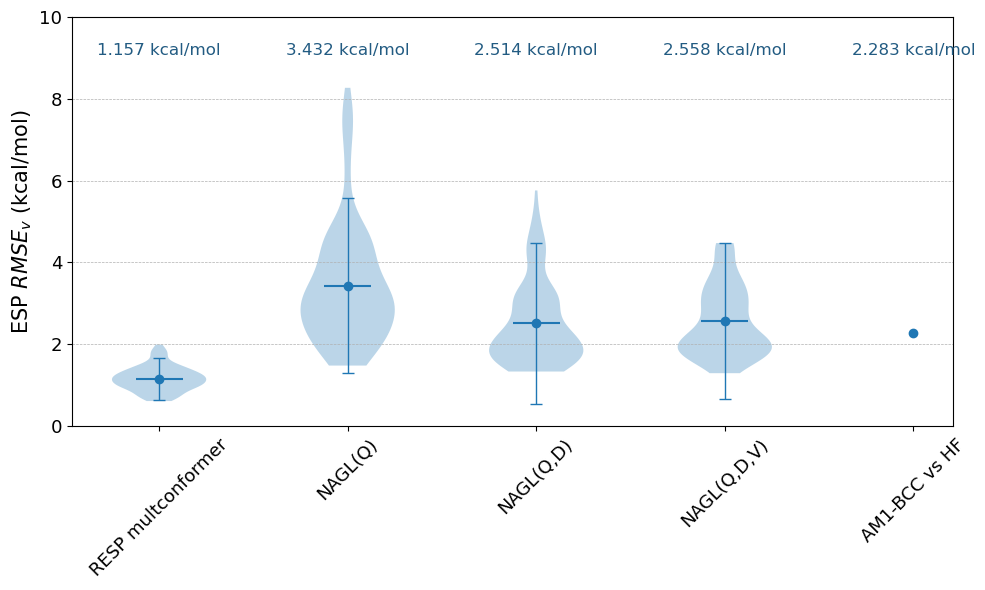

In [ ]:
rows_to_analyse =df

df_nocharge = rows_to_analyse[
    ~(rows_to_analyse['molecule'].str.contains("+", regex = False))  &
    ~(rows_to_analyse['molecule'].str.contains("-", regex = False))
]

# Collect standard deviations across atoms for each chcompare_columnsarge model
std_deviation_data = {model: [] for model in compare_columns}

for smiles, group in grouped:
    for model in compare_columns:
        # Stack charges across conformers for the current model
        charges = np.vstack(group[model].to_list())  # Shape: (num_conformers, num_atoms)
        # Compute standard deviation for each atom across conformers
        std_deviation = np.std(charges, axis=0)  # Shape: (num_atoms,)
        # Add to the dataset for the box plot
        std_deviation_data[model].extend(std_deviation)
        
# mean_std_deviation = {model: np.mean(std_deviation_data[model]) for model in compare_columns}

plt.figure(figsize=(10, 6))
violin_data = [df_nocharge[model] for model in compare_columns]

# Draw the violin plot with means displayed
parts = plt.violinplot(
    violin_data,
    showmeans=True,  # show the green mean lines inside violins
    showextrema=False,
    showmedians=False
)

# Mark means and std deviations with error bars
for i, model in enumerate(compare_columns, start=1):
    mean_val = df_nocharge[model].mean()
    std_val = np.array(std_deviation_data[model]).std()
    print(std_val)
    # Use errorbar to create vertical lines with top/bottom caps (±1 std)
    plt.errorbar(
        i,                  # x-position
        mean_val,           # y-position (the mean)
        yerr=std_val,       # the error margin for top/bottom
        fmt='o',            # marker style
        color="#1f77b4",    # color for the marker
        ecolor="#1f77b4",   # color for the error bars
        elinewidth=1,       # thickness of the error bar lines
        capsize=4,          # length of the top/bottom caps
        capthick=1,         # thickness of the cap lines
        zorder=3
    )
    
    # Optionally add text to label the mean above the error bar
    plt.text(
        i,
        9,          # small offset above the mean point
        f"{mean_val:.3f} kcal/mol",
        ha="center",
        va="bottom",
        color="#225b82",           # text color
        fontsize=12,
        zorder=4
    )

# Optionally limit the y-axis for better visibility
plt.ylim(0, 10)

# Add labels and grid
labels = ['RESP multconformer', 'NAGL(Q)','NAGL(Q,D)','NAGL(Q,D,V)','AM1-BCC vs HF']

plt.xticks(range(1, len(compare_columns) + 1), labels, rotation=45)
plt.ylabel('ESP $RMSE_{v}$ (kcal/mol)', fontsize=15)
plt.grid(axis="y", linestyle='--', linewidth=0.5)
plt.savefig("conformer_test_nocharges.png",dpi=400, bbox_inches="tight")
plt.tight_layout()
plt.show()


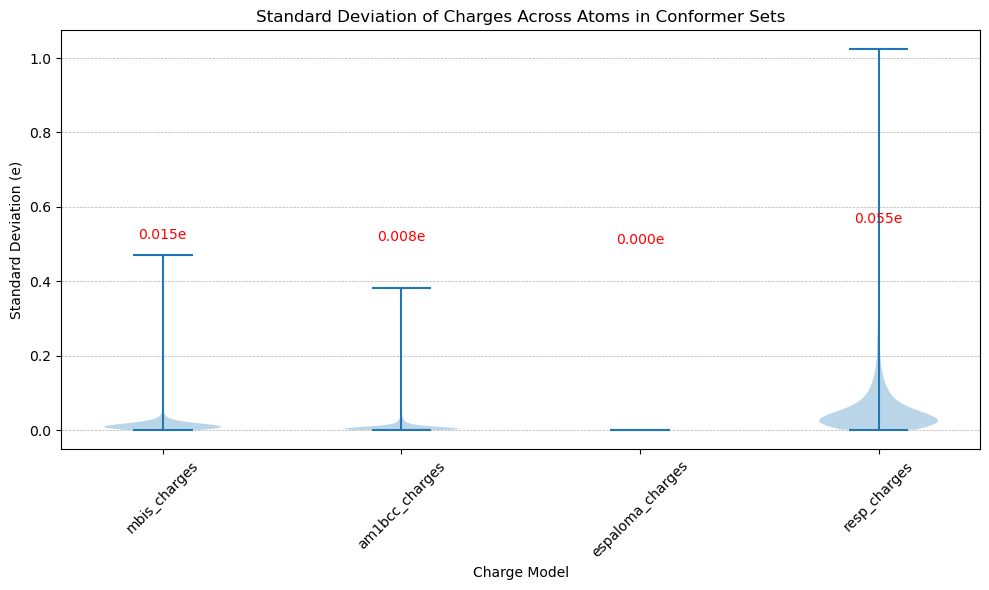

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Group data by smiles
grouped = df.groupby("smiles")

# Charge models to analyze
charge_models = ["mbis_charges", "am1bcc_charges", "espaloma_charges", "resp_charges"]

# Collect standard deviations across atoms for each charge model
std_deviation_data = {model: [] for model in charge_models}
mean_std_deviation = {}  # To store mean standard deviations for annotation

for smiles, group in grouped:
    for model in charge_models:
        # Stack charges across conformers for the current model
        charges = np.vstack(group[model].to_list())  # Shape: (num_conformers, num_atoms)
        # Compute standard deviation for each atom across conformers
        std_deviation = np.std(charges, axis=0)  # Shape: (num_atoms,)
        # Add to the dataset for the violin plot
        std_deviation_data[model].extend(std_deviation)

# Calculate mean standard deviation for each charge model
mean_std_deviation = {model: np.mean(std_deviation_data[model]) for model in charge_models}

# Prepare data for the violin plot
violin_data = [std_deviation_data[model] for model in charge_models]

# Plotting the violin plot
plt.figure(figsize=(10, 6))
parts = plt.violinplot(violin_data, showmeans=False)

# Add mean standard deviation values above each violin
for i, model in enumerate(charge_models, start=1):
    mean_value = mean_std_deviation[model]
    plt.text(i, mean_value + 0.50, f"{mean_value:.3f}e", ha="center", color="red", fontsize=10)

# Add labels and grid
plt.xticks(range(1, len(charge_models) + 1), charge_models, rotation=45)
plt.title("Standard Deviation of Charges Across Atoms in Conformer Sets")
plt.xlabel("Charge Model")
plt.ylabel("Standard Deviation (e)")
plt.grid(axis="y", linestyle='--', linewidth=0.5)  # Remove vertical grid lines
plt.tight_layout()
plt.show()


/scratch/ipykernel_19688/2464158603.py:39: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(box_data, labels=charge_labels, showfliers=False)  # Exclude outliers


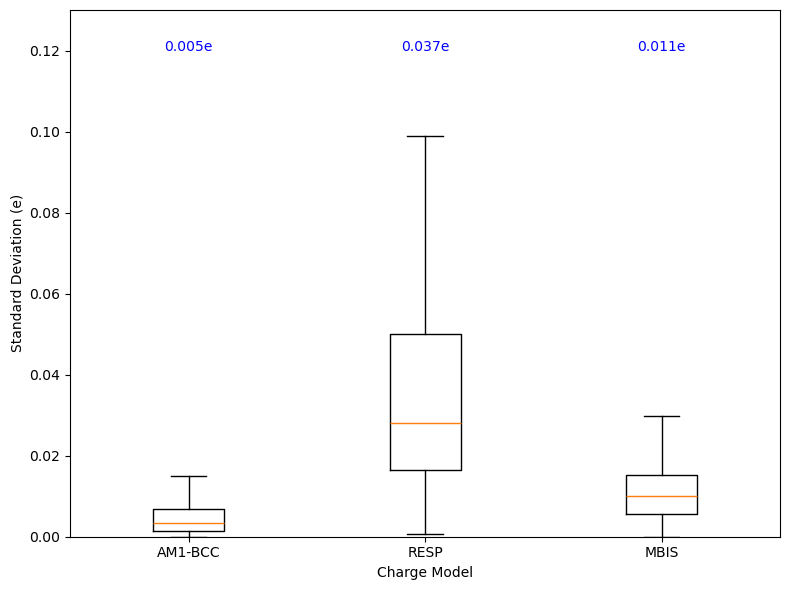

Outliers for Am1Bcc Charges:
[0.02127436266834908, 0.027303437029266315, 0.13384888309935364, 0.022106319012395032, 0.059458316690023334, 0.07563188513194101, 0.07563188513194101, 0.022106319012395032, 0.059458316690023334, 0.07563188513194101, 0.07563188513194101, 0.11215947800763182, 0.02127436266834908, 0.027303437029266315, 0.13384888309935364, 0.022106319012395032, 0.059458316690023334, 0.07563188513194101, 0.07563188513194101, 0.022106319012395032, 0.059458316690023334, 0.07563188513194101, 0.07563188513194101, 0.052022016239387646, 0.07644566811540804, 0.07644566811540804, 0.02831078575874887, 0.02831078575874887, 0.04555370647500717, 0.02831078575874887, 0.02831078575874887, 0.04555370647500717, 0.02662686301490771, 0.04215013016472844, 0.04215013016472844, 0.02662686301490771, 0.024157408005579938, 0.055716537876384205, 0.025708742152875875, 0.025708742152875875, 0.024157408005579938, 0.055716537876384205, 0.025708742152875875, 0.025708742152875875, 0.024157408005579938, 0.055

In [ ]:
# Group data by smiles
grouped = df.groupby("smiles")

# Updated charge models to analyze (in the desired order)
charge_models = ["am1bcc_charges", "resp_charges", "mbis_charges", ""]

# Labels for the x-axis
charge_labels = ["AM1-BCC", "RESP", "MBIS"]

# Collect standard deviations across atoms for each charge model
std_deviation_data = {model: [] for model in charge_models}
outliers = {model: [] for model in charge_models}  # To store outliers separately

for smiles, group in grouped:
    for model in charge_models:
        # Stack charges across conformers for the current model
        charges = np.vstack(group[model].to_list())  # Shape: (num_conformers, num_atoms)
        # Compute standard deviation for each atom across conformers
        std_deviation = np.std(charges, axis=0)  # Shape: (num_atoms,)
        # Add to the dataset for the box plot
        std_deviation_data[model].extend(std_deviation)

# Identify outliers using the IQR rule
for model, data in std_deviation_data.items():
    q1, q3 = np.percentile(data, [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    # Separate outliers
    outliers[model] = [x for x in data if x < lower_bound or x > upper_bound]
    # Remove outliers from the main dataset
    std_deviation_data[model] = [x for x in data if lower_bound <= x <= upper_bound]

# Prepare data for the box plot
box_data = [std_deviation_data[model] for model in charge_models]

# Plotting the box plot
plt.figure(figsize=(8, 6))
plt.boxplot(box_data, labels=charge_labels, showfliers=False)  # Exclude outliers
plt.ylim(0, 0.13)  # Set fixed y-axis range

# Annotate mean values for each charge model
mean_std_deviation = {model: np.mean(std_deviation_data[model]) for model in charge_models}
for i, model in enumerate(charge_models, start=1):
    mean_value = mean_std_deviation[model]
    plt.text(i, 0.12, f"{mean_value:.3f}e", ha="center", color="blue", fontsize=10)

# Add labels and grid
# plt.title("Standard Deviation of Charges Across Atoms in Conformer Sets")
plt.xlabel("Charge Model")
plt.ylabel("Standard Deviation (e)")
# plt.grid(axis="y", linestyle='--', linewidth=0.5)
plt.tight_layout()

plt.savefig('conformer_charge_transfer.png')
# Show the box plot
plt.show()

# Print outliers separately
for model, outlier_values in outliers.items():
    print(f"Outliers for {model.replace('_', ' ').title()}:")
    print(outlier_values)
    print("---------")

In [ ]:
charge_models = ["am1bcc_esp", "resp_esp", "mbis_esp"]

compare_with = "qm_esp"




{'mbis_charges': [0.0006994935660714942,
  0.005871808830641483,
  0.008782684495693915,
  0.008947518478558042,
  0.005827503700104636,
  0.01749290079114495,
  0.019504909028747536,
  0.00712819330242818,
  0.005235379687791834,
  0.010499578360525745,
  0.007187452851954866,
  0.003596747155189182,
  0.008809907805309429,
  0.0027575961420574276,
  0.002606043264043893,
  0.0008635588343833915,
  0.0006911536371826267,
  0.001986796120259516,
  0.0005980025965195742,
  0.0017632791840824725,
  0.0016500317723918746,
  0.0007314176424576932,
  0.0004552659933717988,
  0.0002742916678580283,
  0.00016053285455752526,
  0.001431355207937409,
  0.0059985590454115795,
  0.010351382596372014,
  0.009351358740258945,
  0.007060136093337669,
  0.006982872136019148,
  0.003444501321857407,
  0.014684387192362184,
  0.009801445801820895,
  0.022561205159397326,
  0.0005493692100163734,
  0.004694480137433772,
  0.006165742672141327,
  0.002505726355163484,
  0.008571005190993195,
  0.01177716

In [ ]:
aggregated_variances

{'mbis_charges': array([0.00012048]),
 'am1bcc_charges': array([4.71157887e-07]),
 'espaloma_charges': array([1.96723234e-33]),
 'riniker_monopoles': array([0.0001029]),
 'resp_charges': array([0.00250897])}

In [ ]:
np.var(df.groupby("smiles")["mbis_charges"])

TypeError: GroupBy.var() got an unexpected keyword argument 'axis'

In [ ]:
len(MoleculePropStore("/mnt/storage/nobackup/nca121/paper_charge_comparisons/async_chargecraft_more_workers/conformer_test/ESP_rebuilt_conformers.db").list())

44

In [ ]:
df.groupby("smiles")["mbis_charges"].var()

TypeError: agg function failed [how->var,dtype->object]

In [ ]:
#How do the average charges for each conformer deviate for MBIS, AIM-BCC and Riniker?

array([-6.21355760e+07, -5.16772400e+07, -5.33537680e+07, -7.05711120e+07,
       -5.34185520e+07, -5.38605040e+07,  6.27200960e+08, -5.34099920e+07,
       -5.14962160e+07, -5.14078320e+07, -5.77878000e+07, -6.09101680e+07,
        1.04969232e+08, -5.35510800e+07,  1.05354656e+08,  1.04453928e+08,
       -5.19435760e+07, -4.85543600e+07, -6.11383760e+07, -5.51497520e+07,
       -5.16125520e+07])

In [ ]:
df['molecule'][1]

'[C:1]1([H:11])([H:12])[C:2]([H:13])([H:14])[N:3]([H:15])[C:4]([H:16])([H:17])[C:5]([H:18])([H:19])[C:6]12[C:7]([H:20])([H:21])[C:8]2([F:9])[F:10]'

In [ ]:
df_test['riniker_monopoles'][1]


array([-0.30706286,  0.01613098, -0.61173737,  0.01618296, -0.30706492,
       -0.02591953, -0.55395246,  0.56771886, -0.2302343 , -0.23025821,
        0.12835543,  0.13995531,  0.09794524,  0.09850284,  0.33001465,
        0.09795122,  0.0984723 ,  0.12831767,  0.13995227,  0.20337409,
        0.20335594])

In [ ]:
df['molecule'][1]

'[C:1]1([H:11])([H:12])[C:2]([H:13])([H:14])[N:3]([H:15])[C:4]([H:16])([H:17])[C:5]([H:18])([H:19])[C:6]12[C:7]([H:20])([H:21])[C:8]2([F:9])[F:10]'

In [ ]:
len(df.iloc[0]['mbis_charges'])

17

In [ ]:
def explode_charges(df, charge_columns, molecule_column='molecule'):
    rows = []
    for _, row in df.iterrows():
        charges_dict = {col: row[col] for col in charge_columns if row[col] is not None}
        n_charges = len(charges_dict[charge_columns[0]])  # Number of charges per molecule
        for i in range(n_charges):
            exploded_row = {col: charges_dict[col][i] for col in charge_columns}
            exploded_row[molecule_column] = row[molecule_column]
            exploded_row['element_index'] = i + 1  # Add index for the atom/element
            rows.append(exploded_row)
    return pd.DataFrame(rows)

# Define charge columns
charge_columns = ['mbis_charges', 'am1bcc_charges','riniker_monopoles', 'espaloma_charges','resp_charges']

# Explode the DataFrame
exploded_df = explode_charges(df, charge_columns)


In [ ]:
# Define the columns you want to compare against QM_HF_Dipoles
compare_columns = ['am1bcc_charges','riniker_monopoles', 'espaloma_charges','resp_charges']


# Initialize a PairGrid with col_wrap set to 3 for 3 columns per row
grid = sb.PairGrid(exploded_df, x_vars=compare_columns, y_vars=['mbis_charges'], height=4, aspect=0.8)
# Set axis limits
grid.set(xlim=(-1.5,1.5), ylim=(-1.5,1.5))


# Map the plots to the grid
grid = grid.map(kde)
grid = grid.map_offdiag(equalityline, color='gray', ls='-')
grid = grid.map_offdiag(m)
grid.map_diag(sb.kdeplot, color='gray')


# Display the plot
plt.savefig('comparison_of_charges.png', dpi=1000)
plt.show()

NameError: name 'sb' is not defined

In [ ]:
# Define the columns you want to compare against QM_HF_Dipoles
compare_columns = ['mbis_dipoles','am1bcc_dipole','espaloma_dipole','riniker_dipoles','resp_dipole']
# Define columns to exclude
exclude_columns = ['riniker_dipoles', 'riniker_monopoles', 'riniker_esp_rms']

# Drop the columns
df_filtered = df.drop(columns=exclude_columns, errors='ignore')

# Adjust the compare_columns to exclude 'riniker_dipoles'
compare_columns = [col for col in compare_columns if col not in exclude_columns]

df_filtered = df_filtered.replace([np.inf, -np.inf], np.nan).dropna()


# Initialize PairGrid with the filtered DataFrame
grid = sb.PairGrid(df_filtered, x_vars=compare_columns, y_vars=['qm_dipoles'], height=4, aspect=0.8)



# # Initialize a PairGrid with col_wrap set to 3 for 3 columns per row
# grid = sb.PairGrid(df_plot, x_vars=compare_columns, y_vars=['qm_dipoles'], height=4, aspect=0.8)

# Map the plots to the grid
grid = grid.map(kde)
grid = grid.map_offdiag(equalityline, color='gray', ls='-')
grid = grid.map_offdiag(m)
grid.map_diag(sb.kdeplot, color='gray')

# Set axis limits
grid.set(xlim=(0,1.5), ylim=(0,1.5))

# Display the plot
plt.savefig('comparison_of_dipoles.png', dpi=1000)
plt.show()

TypeError: Cannot compare types 'ndarray(dtype=object)' and 'float'

Text(0, 0.5, 'ESP $RMSE_{v}$ kcal/mol')

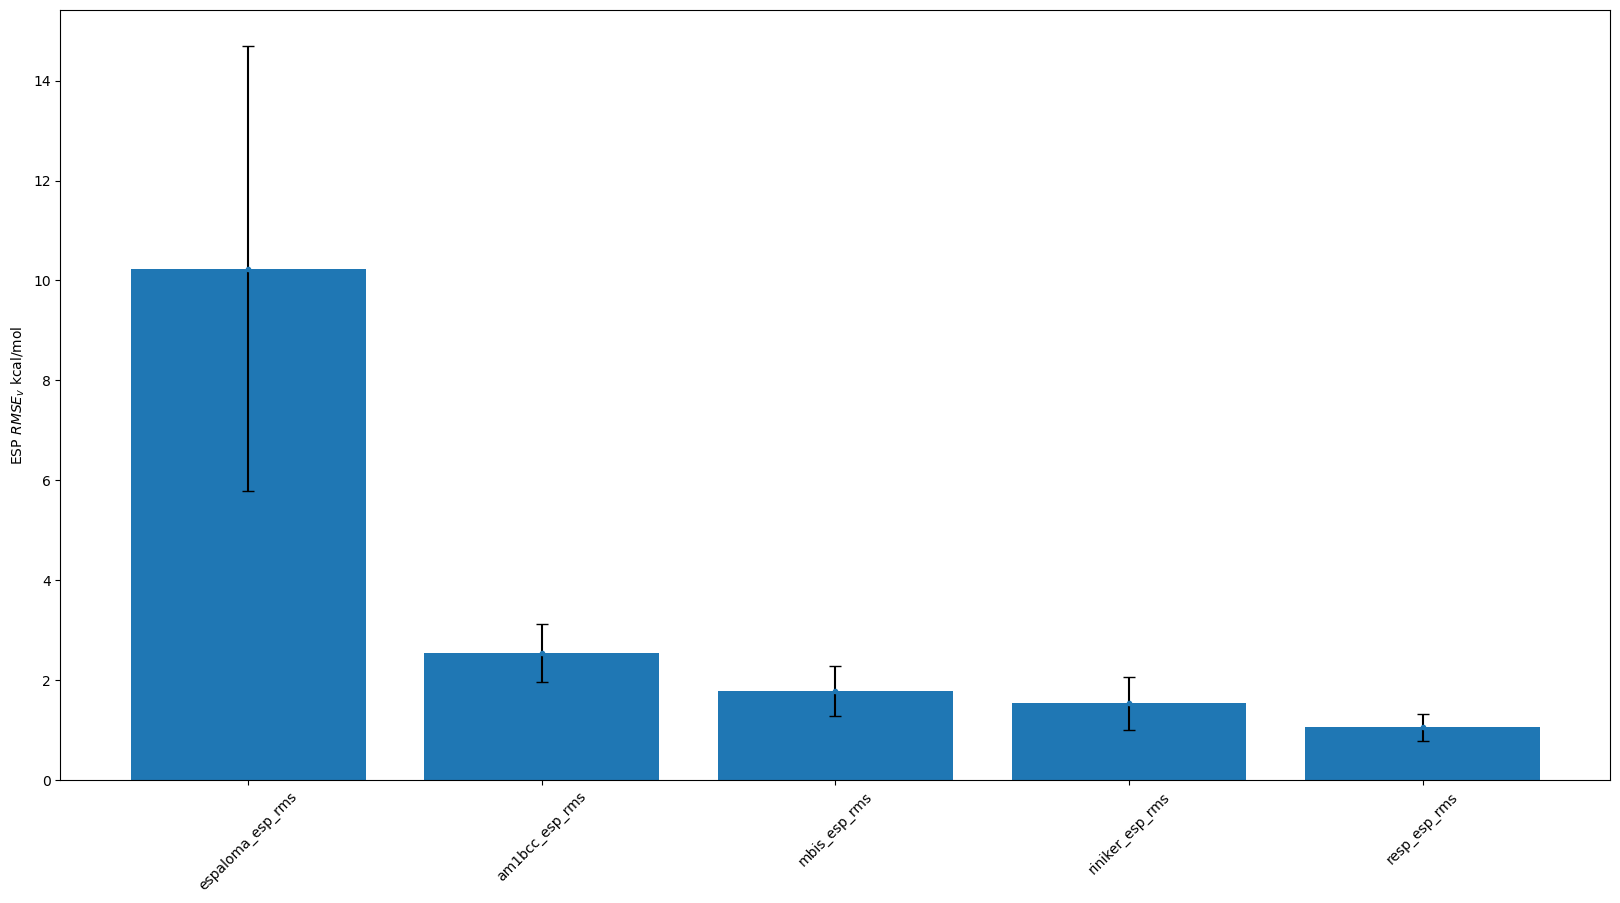

In [ ]:
import matplotlib.patches as mpatches
compare_columns = ['am1bcc_esp_rms','espaloma_esp_rms','riniker_esp_rms','mbis_esp_rms','resp_esp_rms']

mean_values = df[compare_columns].mean()

# Convert the Series to a DataFrame
mean_values_df = mean_values.to_frame(name='mean')
mean_values_df['std_dev'] = df[compare_columns].std()

mean_values_df = mean_values_df.sort_values(by='mean',ascending=False)
plt.figure(figsize=(20,10))
plt.bar(x=mean_values_df.index,height=mean_values_df['mean'])#,color=mean_values_df['color'])
plt.errorbar(x=mean_values_df.index, y=mean_values_df['mean'], yerr=mean_values_df['std_dev'],fmt=".",ecolor='black',capsize=4)
plt.xticks(rotation=45)

plt.ylabel('ESP $RMSE_{v}$ kcal/mol')

# red_patch = mpatches.Patch(color='red', label='Requires QM calculation')
# green_patch = mpatches.Patch(color='green', label='Requires semi-empirical QM calculation')
# blue_patch = mpatches.Patch(color='blue', label='No QM calculation required')

# plt.savefig('esp_comparison.png', dpi=800)
# plt.legend(handles=[red_patch, green_patch, blue_patch])

In [ ]:
# Define the columns you want to compare against QM_HF_Dipoles
compare_columns = ['am1bcc_charges','espaloma_charges','riniker_monopoles','resp_charges']


# Initialize a PairGrid with col_wrap set to 3 for 3 columns per row
grid = sb.PairGrid(exploded_df, x_vars=compare_columns, y_vars=['qm_dipoles'], height=4, aspect=0.8)

# Map the plots to the grid
grid = grid.map(kde)
grid = grid.map_offdiag(equalityline, color='gray', ls='-')
grid = grid.map_offdiag(m)
grid.map_diag(sb.kdeplot, color='gray')

# Set axis limits
grid.set(xlim=(-1,1.5), ylim=(-1,1.5))

# Display the plot
plt.savefig('comparison_of_charges.png', dpi=1000)
plt.show()

17

In [ ]:
df.to_csv('./sanity_check.csv')

In [ ]:
df.iloc[0]

mbis_charges         [-0.44171691769759425, 0.19215883543444148, -0...
am1bcc_charges       [-0.15928235294117646, 0.13051764705882352, -0...
espaloma_charges     [-0.2646322256940253, 0.09048017793718506, -0....
riniker_monopoles    [-0.4982544779777527, 0.08591508120298386, -0....
resp_charges         [-0.2238, 0.1144, -0.3794, 0.1839, 0.4749, -0....
qm_dipoles                                                    0.372726
mbis_dipoles                                                  0.196034
am1bcc_dipole                                                 0.099876
espaloma_dipole                                               0.568253
riniker_dipoles                                               0.042476
resp_dipole                                                   0.179598
molecule             [C:1]1([H:10])([H:11])[C:2]([H:12])([H:13])[O:...
grid                 [[-4.959543008824821, -1.4344262395541767, 0.2...
Name: 0, dtype: object

In [ ]:
df.iloc[2]

mbis_charges         [-0.273265076200354, 0.19154401299583018, -0.4...
am1bcc_charges       [-0.1094, 0.1304, -0.4296, 0.1141, -0.00559999...
espaloma_charges     [-0.2049732649077972, 0.10700781705478828, -0....
riniker_monopoles    [-0.31433048844337463, 0.07334760576486588, -0...
resp_charges         [-0.049, 0.1191, -0.4819, 0.4558, -0.3094, -0....
qm_dipoles                                                    1.245573
mbis_dipoles                                                  0.695169
am1bcc_dipole                                                 0.780104
espaloma_dipole                                               0.978258
riniker_dipoles                                                0.13114
resp_dipole                                                   0.653697
molecule             [C:1]1([H:9])([H:10])[C:2]([H:11])([H:12])[O:3...
grid                 [[-5.238149148667286, 0.1674437813895311, 0.15...
Name: 2, dtype: object

/mnt/nfs/home/nca121/mambaforge/envs/charge_model_env/lib/python3.11/site-packages/rdkit/Chem/Draw/IPythonConsole.py:261: UserWarning: Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.
  warnings.warn(


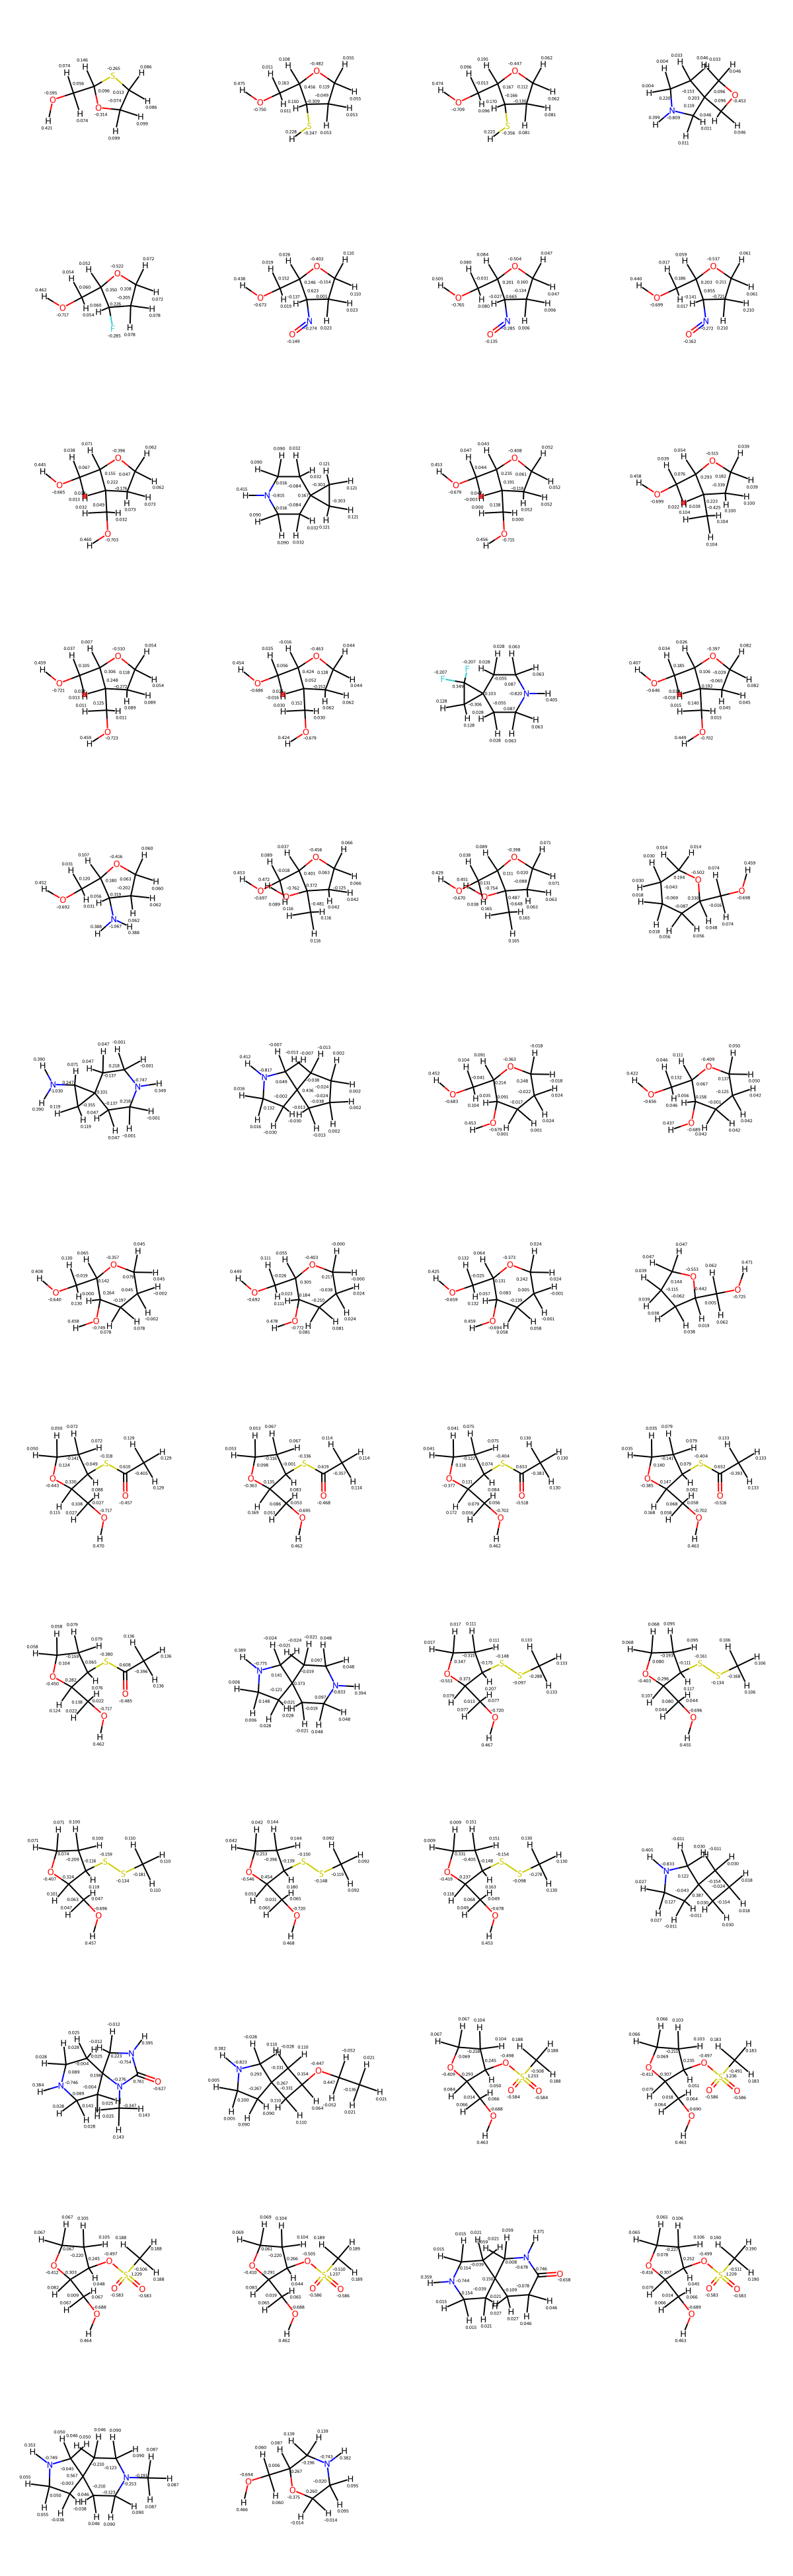

In [ ]:
draw_mols  = list(range(1,80))
images = []
for mol in draw_mols:
    openff_molecule = Molecule.from_mapped_smiles(df.iloc[mol]['molecule'], allow_undefined_stereo=True)
    rdkit_mol = openff_molecule.to_rdkit()
    resp_charges =  df.iloc[mol]['resp_charges']
    for i, atom in enumerate(rdkit_mol.GetAtoms()):
        lbl = '%.3f' % (resp_charges[i])
        atom.SetProp('atomNote', lbl)
    images.append(rdkit_mol)

img = Draw.MolsToGridImage(images, molsPerRow=4, subImgSize=(300, 300))
img

/scratch/ipykernel_13008/2251617336.py:1: AtomMappingWarning: Warning! Fully mapped SMILES pattern passed to `from_smiles`. The atom map is stored as a property in `Molecule._properties`, but these indices are NOT used to determine atom ordering. To use these indices for atom ordering, use `Molecule.from_mapped_smiles`.
  openff_molecule = Molecule.from_smiles(df.iloc[1]['molecule'], allow_undefined_stereo=True)


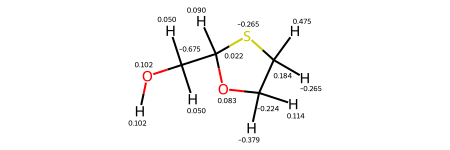

In [ ]:


openff_molecule = Molecule.from_smiles(df.iloc[1]['molecule'], allow_undefined_stereo=True)
rdkit_mol = openff_molecule.to_rdkit()
resp_charges =  df.iloc[0]['resp_charges']
for i, atom in enumerate(rdkit_mol.GetAtoms()):
    lbl = '%.3f' % (resp_charges[i])
    atom.SetProp('atomNote', lbl)
rdkit_mol

In [ ]:
from chargecraft.storage.storage import MoleculePropRecord, MoleculePropStore
from MultipoleNet import load_model, build_graph_batched, D_Q
riniker_model = load_model()


2024-11-18 15:23:53.457013: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Instructions for updating:
experimental_relax_shapes is deprecated, use reduce_retracing instead


In [ ]:
prop_store = MoleculePropStore('/mnt/storage/nobackup/nca121/paper_charge_comparisons/async_chargecraft_more_workers/ESP_rebuilt.db')
prop_store.list()

['OCC1OCCS1',
 'OCC1OCCC1F',
 'OCC1OCCC1S',
 'O=NC1CCOC1CO',
 'OCC1OCCC1(F)F',
 'C1CC2(CN1)COC2',
 'O=[N+]([O-])C1CCOC1CO',
 'NC1CCOC1CO',
 '[N-]=[N+]=NC1CCOC1CO',
 'CC1CCOC1CO',
 'OCC1CCOC1CO',
 'C1CC2(CCN1)CC2',
 'CC1(O)CCOC1CO',
 'FC1(F)CC12CCNCC2',
 '[NH3+]C1(O)CCOC1CO',
 'CC(=O)SC1CCOC1CO',
 'NC1CC12CCNCC2',
 'C1CCC2(C1)CCNC2',
 'C[NH+](C)C1CCOC1CO',
 'CP(=O)([O-])OC1CCOC1CO',
 'OCC1CCCCO1',
 'OCC1OCCCC1O',
 'OCC1CCCO1',
 '[NH3+]CCSSC1CCOC1CO',
 'CSSC1CCOC1CO',
 '[N-]=[N+]=NCC1CCOC1CO',
 'C1CC2(CC[NH2+]CC2)CN1',
 'C1CC2(CCN1)CCNC2',
 'C1CC2(CCN1)C1C[NH2+]CC12',
 'C1CC2(C1)CCNC2',
 'CN1C(=O)NCC12CCNCC2',
 'O=C1CCC2(CCNCC2)CN1',
 'CCOC1CC2(CCNC2)C1',
 '[NH3+]C1CCOC1CO',
 'CS(=O)(=O)OC1CCOC1CO',
 'CN1CCC2(CCNC2)CC1',
 'CN1CCOCC12CCNCC2',
 'CC1CC2(CCNCC2)CN1',
 'C[NH+]1CCOCC12CCNCC2',
 'C1CC2(CCNC2)CN1',
 'C=C1CCOC1CO',
 'OCC1CNCCO1',
 'C1CC2(CN1)CNC2',
 'OCC1OCCC(O)C1O',
 'C1CC2(CCN1)COC2',
 'N#CSC1CCOC1CO',
 'OCC1OCCC1O',
 'NC1(O)CCOC1CO',
 'C[NH+]1CC2(CCNC2)C1',
 'NCC1CC12CCNCC2',


In [ ]:
molecule = prop_store.retrieve(smiles='OCC1OCCS1')

In [ ]:
mapped_smiles = molecule[0].tagged_smiles
conformer_quantity = molecule[0].conformer_quantity
openff_mol = Molecule.from_mapped_smiles(mapped_smiles=mapped_smiles, allow_undefined_stereo=True)
openff_mol.add_conformer(conformer_quantity)
rdkit_conformer = openff_mol.to_rdkit()
elements = [a.GetSymbol() for a in rdkit_conformer.GetAtoms()]
coordinates = rdkit_conformer.GetConformer(0).GetPositions().astype(np.float32)

In [ ]:
from espaloma_charge.openff_wrapper import EspalomaChargeToolkitWrapper

toolkit_wrapper = EspalomaChargeToolkitWrapper()

openff_mol.assign_partial_charges('espaloma-am1bcc', toolkit_registry=toolkit_wrapper)

/mnt/nfs/home/nca121/mambaforge/envs/charge_model_env/lib/python3.11/site-packages/espaloma_charge/openff_wrapper.py:112: IncorrectNumConformersWarning: Molecule 'Molecule with name '' and SMILES '[H][O][C]([H])([H])[C]1([H])[O][C]([H])([H])[C]([H])([H])[S]1'' has 1 conformers, but charge method 'espaloma-am1bcc' expects exactly 0.
  self._check_n_conformers(
/mnt/nfs/home/nca121/mambaforge/envs/charge_model_env/lib/python3.11/site-packages/dgl/heterograph.py:92: DGLWarning: Recommend creating graphs by `dgl.graph(data)` instead of `dgl.DGLGraph(data)`.
  dgl_warning(


In [ ]:
openff_mol.partial_charges

array([ 0.10370073, -0.20816672, -0.29328483,  0.09934076, -0.37793287,
        0.18753447, -0.68438011,  0.1105975 ,  0.1105975 ,  0.14053039,
        0.14053039,  0.11685429,  0.08291832,  0.08291832,  0.38824186]) <Unit('elementary_charge')>

In [ ]:
molecule[0].mbis_charges_quantity

array([[ 0.18318003],
       [-0.25986344],
       [-0.23324592],
       [ 0.20927146],
       [-0.43504134],
       [ 0.13056606],
       [-0.66881527],
       [ 0.07737889],
       [ 0.05457898],
       [ 0.13401891],
       [ 0.14239135],
       [ 0.08841999],
       [ 0.06529237],
       [ 0.05497736],
       [ 0.4569254 ]]) <Unit('elementary_charge')>

In [ ]:
test_mol = prop_store.retrieve(smiles='[H][O][C]([H])([H])[C]1([H])[O][C]([H])([H])[C]([H])([H])[C]1([F])[F]')

In [ ]:
test_mol[0].mbis_charges_quantity

array([[-0.44171692],
       [ 0.19215884],
       [-0.43095924],
       [ 0.03781578],
       [ 0.69789878],
       [-0.30650265],
       [-0.31078307],
       [ 0.15108314],
       [-0.68119875],
       [ 0.15312256],
       [ 0.15044178],
       [ 0.07560967],
       [ 0.04216704],
       [ 0.09957404],
       [ 0.06347353],
       [ 0.0535153 ],
       [ 0.45429607]]) <Unit('elementary_charge')>

In [ ]:
test_mol[0].conformer_quantity

array([[-1.25471834,  0.68229875, -0.67971235],
       [-1.85845911, -0.30101415,  0.3355888 ],
       [-0.89300086, -0.41681653,  1.3497422 ],
       [ 0.35976166, -0.44634367,  0.72908314],
       [ 0.23729215,  0.59589564, -0.38179175],
       [ 0.71955659,  1.79205886,  0.01817445],
       [ 0.97078021,  0.24513641, -1.4536694 ],
       [ 1.46639057, -0.18563377,  1.72534578],
       [ 1.63135068, -1.34326994,  2.49459367],
       [-1.59060063,  1.69524064, -0.50401824],
       [-1.45855145,  0.41770197, -1.70844257],
       [-2.77719369,  0.04851399,  0.78206526],
       [-2.03979799, -1.27186493, -0.11840523],
       [ 0.52563888, -1.41250883,  0.25824935],
       [ 1.19503643,  0.66712811,  2.33712881],
       [ 2.37780502,  0.05598759,  1.18389061],
       [ 2.22218569, -1.16612567,  3.21244159]]) <Unit('angstrom')>

In [ ]:
test_off = Molecule.from_mapped_smiles(mapped_smiles=test_mol[0].tagged_smiles, allow_undefined_stereo=True)
test_off.add_conformer(test_mol[0].conformer_quantity.to(unit.bohr))

1

In [ ]:
test_off.assign_partial_charges('am1bcc')
test_off.partial_charges

array([-0.15928235,  0.13051765, -0.42148235,  0.05421765,  0.39171765,
       -0.23168235, -0.23168235,  0.13451765, -0.58968235,  0.08581765,
        0.08581765,  0.05981765,  0.05981765,  0.09081765,  0.06331765,
        0.06331765,  0.41411765]) <Unit('elementary_charge')>

In [ ]:
from ChargeAPI.API_infrastructure.esp_request.module_version_esp import handle_esp_request
molblock = "\n     RDKit          3D\n\n 17 17  0  0  0  0  0  0  0  0999 V2000\n   -1.2547    0.6823   -0.6797 C   0  0  0  0  0  0  0  0  0  0  0  0\n   -1.8585   -0.3010    0.3356 C   0  0  0  0  0  0  0  0  0  0  0  0\n   -0.8930   -0.4168    1.3497 O   0  0  0  0  0  0  0  0  0  0  0  0\n    0.3598   -0.4463    0.7291 C   0  0  0  0  0  0  0  0  0  0  0  0\n    0.2373    0.5959   -0.3818 C   0  0  0  0  0  0  0  0  0  0  0  0\n    0.7196    1.7921    0.0182 F   0  0  0  0  0  0  0  0  0  0  0  0\n    0.9708    0.2451   -1.4537 F   0  0  0  0  0  0  0  0  0  0  0  0\n    1.4664   -0.1856    1.7253 C   0  0  0  0  0  0  0  0  0  0  0  0\n    1.6314   -1.3433    2.4946 O   0  0  0  0  0  0  0  0  0  0  0  0\n   -1.5906    1.6952   -0.5040 H   0  0  0  0  0  0  0  0  0  0  0  0\n   -1.4586    0.4177   -1.7084 H   0  0  0  0  0  0  0  0  0  0  0  0\n   -2.7772    0.0485    0.7821 H   0  0  0  0  0  0  0  0  0  0  0  0\n   -2.0398   -1.2719   -0.1184 H   0  0  0  0  0  0  0  0  0  0  0  0\n    0.5256   -1.4125    0.2582 H   0  0  0  0  0  0  0  0  0  0  0  0\n    1.1950    0.6671    2.3371 H   0  0  0  0  0  0  0  0  0  0  0  0\n    2.3778    0.0560    1.1839 H   0  0  0  0  0  0  0  0  0  0  0  0\n    2.2222   -1.1661    3.2124 H   0  0  0  0  0  0  0  0  0  0  0  0\n  1  2  1  0\n  1  5  1  0\n  1 10  1  0\n  1 11  1  0\n  2  3  1  0\n  2 12  1  0\n  2 13  1  0\n  3  4  1  0\n  4  5  1  0\n  4  8  1  0\n  4 14  1  0\n  5  6  1  0\n  5  7  1  0\n  8  9  1  0\n  8 15  1  0\n  8 16  1  0\n  9 17  1  0\nM  END\n"
result = handle_esp_request(charge_model='RIN',
                   conformer_mol=molblock)
result

grid is

total grid command:
conda run -n riniker python /mnt/nfs/home/nca121/ChargeAPI_test/ChargeAPI/ChargeAPI/esp_models/riniker_model.py                 --conformer '
     RDKit          3D

 17 17  0  0  0  0  0  0  0  0999 V2000
   -1.2547    0.6823   -0.6797 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.8585   -0.3010    0.3356 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.8930   -0.4168    1.3497 O   0  0  0  0  0  0  0  0  0  0  0  0
    0.3598   -0.4463    0.7291 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.2373    0.5959   -0.3818 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7196    1.7921    0.0182 F   0  0  0  0  0  0  0  0  0  0  0  0
    0.9708    0.2451   -1.4537 F   0  0  0  0  0  0  0  0  0  0  0  0
    1.4664   -0.1856    1.7253 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.6314   -1.3433    2.4946 O   0  0  0  0  0  0  0  0  0  0  0  0
   -1.5906    1.6952   -0.5040 H   0  0  0  0  0  0  0  0  0  0  0  0
   -1.4586    0.4177   -1.7084 H   0  0  0  0  0  0  0  0  0  0  

{'esp_result': '[0.01217331464208723, -0.00010272395190474523, 0.0100705821050963, 0.01310537506679281, 0.01571480821942189, 0.0073920179117542735, 0.0043291605210341476, -0.006863911642694535, 0.0017230035780839799, -0.0003380744616278165, -0.014517148112841466, 0.015232874226689347, 0.006478526776316914, -0.005073815530142122, 0.017667564305937883, 0.013857200398152086, 0.012838762955913212, 0.015487776496165324, 0.018602506643552, -0.03569856615400988, -0.02244141148953538, -0.02706344064247599, -0.0292622293600274, -0.037421310361843575, -0.01951555096982688, -0.014329323995224293, -0.0270822607614707, -0.03607017135320963, -0.02173254952561824, -0.018437986368338752, -0.0022178471601935375, -0.009561948749866827, -0.010935039951214911, -0.01281840052098311, -0.014415750301237113, -0.012490564456538983, -0.006832402862534592, -0.01629970407148981, -0.017128730239976284, -0.015154896038575918, -0.008792173851160911, -0.011257383814923678, -0.01915258055774006, -0.017429974137167938,

In [ ]:
import os
import json

mol_grid = None

dict_item = {}
dict_item['abc'] = [molblock, mol_grid]
json_file = os.path.join('molblocks.json')
json.dump(dict_item, open(json_file, "w"))
result = handle_esp_request(
    charge_model='RIN',
    conformer_mol='/mnt/storage/nobackup/nca121/molblocks.json',
    broken_up=True,
    batched= True
)
result


grid is

total grid command:
conda run -n riniker python /mnt/nfs/home/nca121/ChargeAPI_test/ChargeAPI/ChargeAPI/esp_models/riniker_model.py                 --conformer '/mnt/storage/nobackup/nca121/molblocks.json'                 --batched                  --broken_up                                  --not_batched_grid
errors are:
ERROR:root:molbock is 
     RDKit          3D

 17 17  0  0  0  0  0  0  0  0999 V2000
   -1.2547    0.6823   -0.6797 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.8585   -0.3010    0.3356 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.8930   -0.4168    1.3497 O   0  0  0  0  0  0  0  0  0  0  0  0
    0.3598   -0.4463    0.7291 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.2373    0.5959   -0.3818 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7196    1.7921    0.0182 F   0  0  0  0  0  0  0  0  0  0  0  0
    0.9708    0.2451   -1.4537 F   0  0  0  0  0  0  0  0  0  0  0  0
    1.4664   -0.1856    1.7253 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.6314   -1.343

{'file_path': '/mnt/storage/nobackup/nca121/molblock_esp.json',
 'error': 'ERROR:root:molbock is \n     RDKit          3D\n\n 17 17  0  0  0  0  0  0  0  0999 V2000\n   -1.2547    0.6823   -0.6797 C   0  0  0  0  0  0  0  0  0  0  0  0\n   -1.8585   -0.3010    0.3356 C   0  0  0  0  0  0  0  0  0  0  0  0\n   -0.8930   -0.4168    1.3497 O   0  0  0  0  0  0  0  0  0  0  0  0\n    0.3598   -0.4463    0.7291 C   0  0  0  0  0  0  0  0  0  0  0  0\n    0.2373    0.5959   -0.3818 C   0  0  0  0  0  0  0  0  0  0  0  0\n    0.7196    1.7921    0.0182 F   0  0  0  0  0  0  0  0  0  0  0  0\n    0.9708    0.2451   -1.4537 F   0  0  0  0  0  0  0  0  0  0  0  0\n    1.4664   -0.1856    1.7253 C   0  0  0  0  0  0  0  0  0  0  0  0\n    1.6314   -1.3433    2.4946 O   0  0  0  0  0  0  0  0  0  0  0  0\n   -1.5906    1.6952   -0.5040 H   0  0  0  0  0  0  0  0  0  0  0  0\n   -1.4586    0.4177   -1.7084 H   0  0  0  0  0  0  0  0  0  0  0  0\n   -2.7772    0.0485    0.7821 H   0  0  0  0  0  0  